Importing the Dependencies

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Data Collection and Processing

In [348]:
data = pd.read_csv('/content/loan_dataset.csv')

In [349]:
# top 5 recods
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [350]:
# shape of data
data.shape

(614, 13)

In [351]:
# check missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [352]:
#Drop null values
data = data.dropna()

In [353]:
# check null values 
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [354]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [355]:
data.shape

(480, 13)

In [356]:
# Label Encoder
data.replace({'Loan_Status':{"N":0,'Y':1}},inplace=True)

0 ----------> Not Approved

1 ----------> Approved

In [357]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [358]:
#check no.of values in Dependents
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [359]:
# label encoding to dependents
data = data.replace(to_replace='3+', value=4)

In [360]:
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

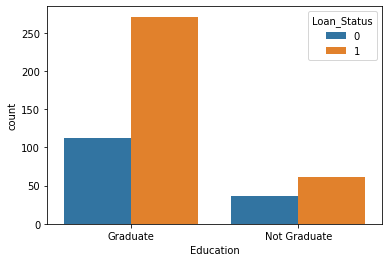

In [361]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

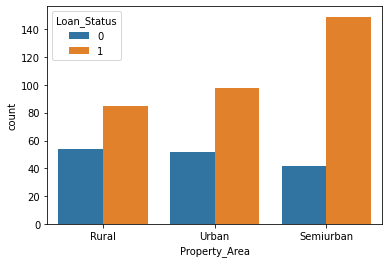

In [362]:
sns.countplot(x='Property_Area',hue='Loan_Status',data = data)

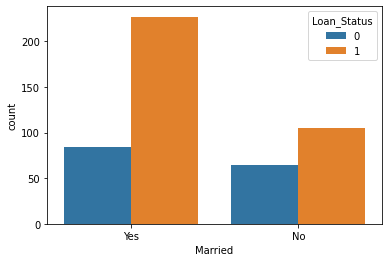

In [363]:
sns.countplot(x='Married',hue='Loan_Status',data = data)

In [364]:
correlation = data.corr()

In [365]:
data['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [366]:
# categorical columns to numerical values
data.replace({'Married':{'No':0,"Yes":1},'Gender':{'Male':0,"Female":1},'Education':{"Graduate":0,"Not Graduate":1},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 68.7+ KB


In [368]:
# After Label data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


Split X and Y

In [369]:
X = data.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = data['Loan_Status']

In [370]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          0              0             4583   
2         0        1          0          0              1             3000   
3         0        1          0          1              0             2583   
4         0        0          0          0              0             6000   
5         0        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          0              0             2900   
610       0        1          4          0              0             4106   
611       0        1          1          0              0             8072   
612       0        1          2          0              0             7583   
613       1        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [371]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [372]:
print(X_train.shape,X_test.shape,data.shape)

(432, 11) (48, 11) (480, 13)


Model Evaluation

In [373]:
model = svm.SVC(kernel='linear')

In [374]:
#train the model
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [375]:
X_train_pred = model.predict(X_train)

In [376]:
#X_train data
X_train_accuracy = accuracy_score(X_train_pred,Y_train)

In [377]:
print('X_train_accuracy_score:',X_train_accuracy)

X_train_accuracy_score: 0.7731481481481481


In [378]:
#X_test_data
X_test_pred = model.predict(X_test)

In [379]:
X_test_accuracy = accuracy_score(X_test_pred,Y_test)

In [380]:
print('X_test_accuracy : ',X_test_accuracy)

X_test_accuracy :  0.8333333333333334


Check The Model

In [386]:
#input
input = (0,	1,	0,	0,	1,	3000,	0.0,	66.0,	360.0,	1.0,1	)

# Dtype change to array 
input_numpy_array = np.asarray(input)

# reshape the array
input_reshape = input_numpy_array.reshape(1,-1)

# prediction

prediction = model.predict(input_reshape)
print(prediction)
if (prediction[0]==0):
  print("The person has not approved loan")
else:
  print("the person has approved loan")

[1]
the person has approved loan


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
